# Avocado Project¶
### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Some relevant columns in the dataset: • Date - The date of the observation • AveragePrice - the average price of a single avocado • type - conventional or organic • year - the year • Region - the city or region of the observation • Total Volume - Total number of avocados sold • 4046 - Total number of avocados with PLU 4046 sold • 4225 - Total number of avocados with PLU 4225 sold • 4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price . Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.

### Dataset Link-
• https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [5]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Evaluation Projects\\First Phase\\Avocado\\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
# Checking rows and columns
df.shape

(18249, 14)

- There are 18249 rows and 14 columns in the dataset
- Out of 14 columns, 13 columns are features and 1 is target variable

In [5]:
# Checking the data type of columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- Out of the 14 columns, 2 are int64, 3 are object and rest all are float64

In [6]:
# Checking more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- All the columns have 18249 rows i.e. no null/missing values
- Out of the 14 columns, 2 are int64, 3 are object and rest all are float64

In [7]:
# Out of all the columns present, let's check if the "Unnamed: 0" columns contains any useful information or not

df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [6]:
# It doesn't have any useful information that can be used for model building therefore, we can drop it from dataset
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
# Extracting the month from date and adding one more column to dataset. The Month column will be used for analysis later
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [13]:
df.shape # deleted 'Unnamed: 0' and added Month column to dataset

(18249, 14)

In [14]:
# Checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

- Validated that there are no null values present in the dataset

In [15]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
dtype: object

In [8]:
# Encoding the Two Columns of object datastype by Label Encoder for region and type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])
df.sample(frac=1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
15415,2017-04-09,0.89,65820.33,11793.22,2019.38,76.45,51931.28,47908.39,4022.89,0.00,1,2017,12,4
12484,2016-05-22,1.31,6711.12,389.47,3323.72,18.38,2979.55,1037.65,1941.90,0.00,1,2016,10,5
17101,2017-06-18,1.72,13816.79,235.14,5136.73,132.12,8312.80,6835.95,1476.85,0.00,1,2017,44,6
13283,2016-01-10,1.46,76440.12,2702.76,34243.57,2813.96,36679.83,12285.03,24394.80,0.00,1,2016,25,1
5791,2017-09-10,1.76,66479.27,36441.41,2816.58,6160.18,21061.10,13679.37,7241.83,139.90,0,2017,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600,2015-11-15,1.20,8896.59,338.88,7249.58,0.00,1308.13,286.67,1021.46,0.00,1,2015,9,11
12494,2016-03-13,1.37,7157.22,376.52,3722.09,4.30,3054.31,619.05,2435.26,0.00,1,2016,10,3
8335,2017-09-10,1.56,26385081.36,9496485.27,8373234.08,487926.52,8027435.49,6035666.24,1818832.48,172936.77,0,2017,51,9
4366,2016-01-10,1.20,3890225.41,96952.31,2696731.85,34789.19,1061752.06,976499.36,85149.37,103.33,0,2016,29,1


In [22]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
month             int64
dtype: object

- We can see that after using LabelEncoder, the type and region columns have been changed to numeric datatype (int64)

In [9]:
# We have year and month in the dataset now which will be used for analysis. So, now 'Date' column can be dropped from the data
df=df.drop(['Date'],axis=1)

In [25]:
# Checking statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


- There are no null values in the dataset
- The 'AveragePrice' columns looks normally distributed( as mean and 50% values are quite close)
- For the Numeric Columns in database the mean is more than the median and implying the columns are positivey skewed

In [10]:
# Checking the skewness of the data
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

- The skewness data should be nearer to the zero to be a normal distribution, but We can see that our data is away from mean. It is tailed towards right and it is positively skewed
- We will deal with the skewness later

In [27]:
#Checking unique values of each columns
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
dtype: int64

In [11]:
# Checking the duplicate values

duplicated_rows = df[df.duplicated()]
print("Duplicate Rows: ")

#print the Resultant Dataframe
duplicated_rows

Duplicate Rows: 


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month


- There are no duplicate rows in the dataset

# EDA

In [29]:
#Frequency table of target column 'AveragePrice'
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

1.4059784097758825


<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

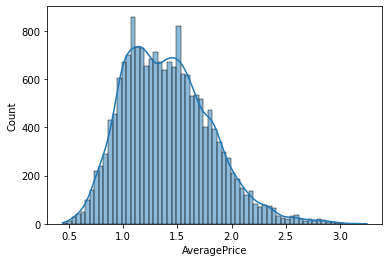

In [30]:
# histogram for the Average Price
print(df['AveragePrice'].mean())
sns.histplot(x='AveragePrice', data=df, kde=True)

- The plot validates that AveragePrice is normally distributed

0    9126
1    9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

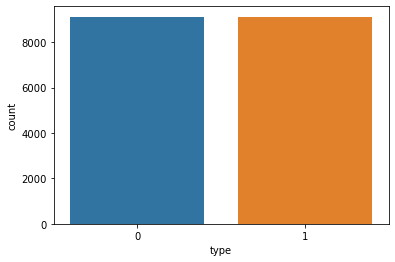

In [32]:
#Count Plot for Type
print(df['type'].value_counts())
sns.countplot(x='type',data=df)

- As we can see that the data for Conventional and Organic type of Avocado is almost same hence there is no need for balancing the data

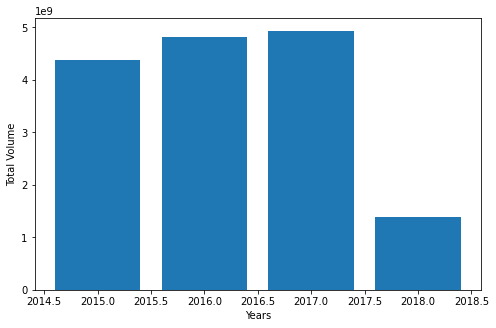

In [33]:
#Bar Plot showing Total volume sold from 2015 to 2018
plt.figure(figsize=(8,5))
df1=df.groupby(["year"])['Total Volume'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("Years")
plt.ylabel("Total Volume")
plt.show()

- The maximum Total Volumes of avocados is in the year 2017

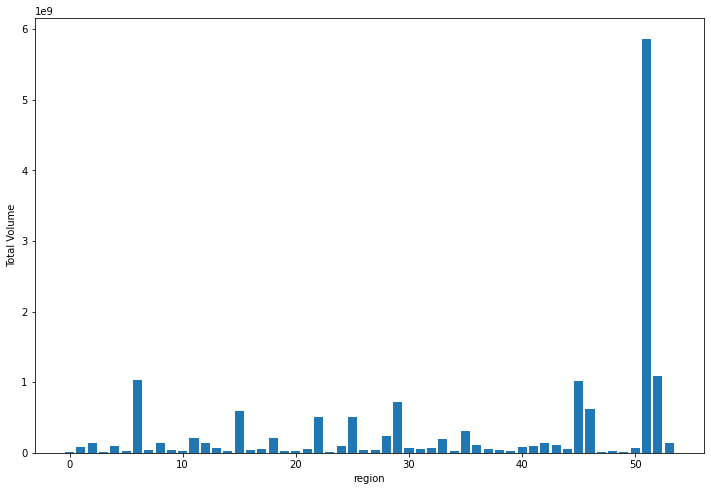

In [35]:
# Plot showing the Total Volume Consumed in regions of USA
plt.figure(figsize=(12,8))
df1=df.groupby(df["region"])['Total Volume'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("region")
plt.ylabel("Total Volume")
plt.show()

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

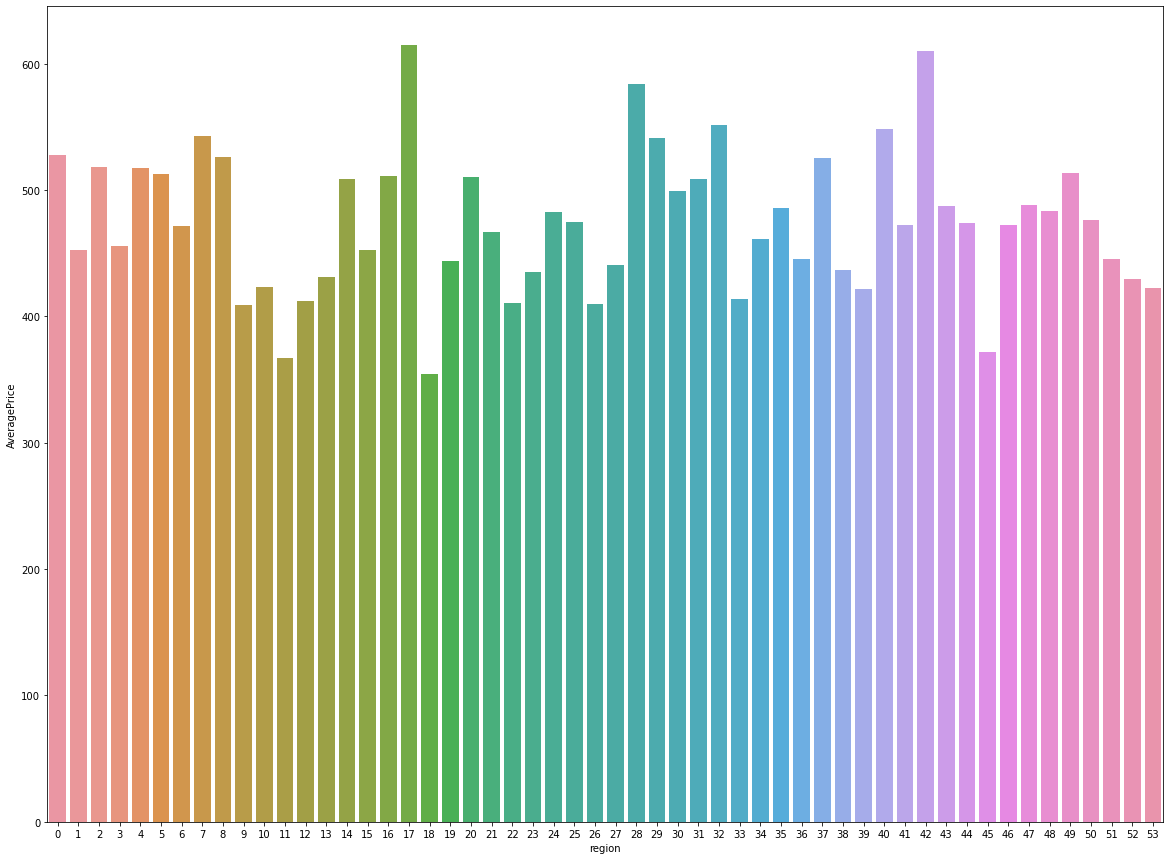

In [36]:
# Plot showing Average Price in diffrent regions of the USA
df1=df.groupby(['region']).sum()
plt.figure(figsize=(20,15))
sns.barplot(x = df1.index,y=df1["AveragePrice"],data = df1)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

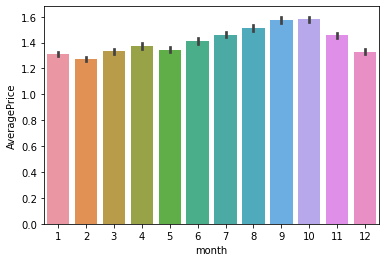

In [37]:
# The average price distributed over the months
sns.barplot(x='month',y='AveragePrice', data=df)

- The sales of avocados is at it's peak during September and October. But, throughout the year the sales don't go very low. Therefore, the demand is consistently good throughout the year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

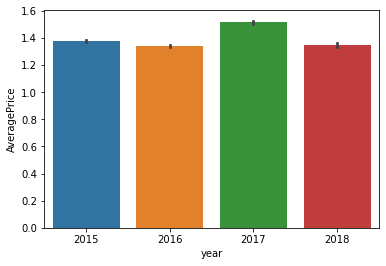

In [38]:
# Average Price vs Year Plot
sns.barplot(x='year',y='AveragePrice', data=df)


- We can see that the in 2017 the average price is little bit high otherwise it is more or less constant only

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

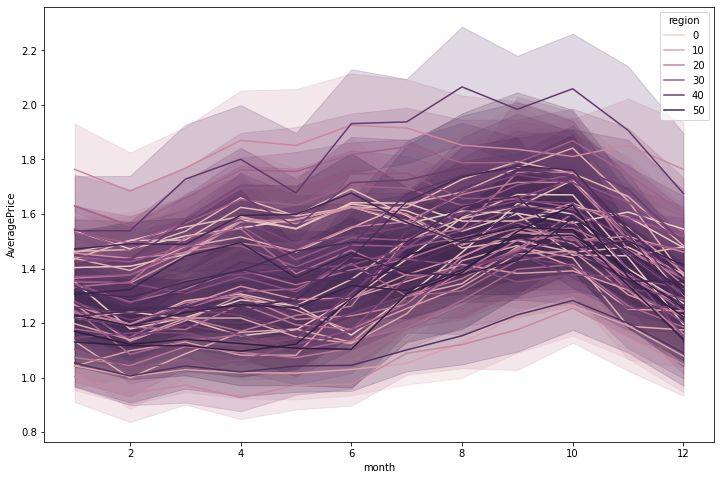

In [41]:
# Line plot for the all the regions over the months
plt.figure(figsize=(12,8))
sns.lineplot(x='month',y='AveragePrice', data=df, hue='region')

- It can be concluded that the the Average Price is higher in the month of september, october and november

<AxesSubplot:>

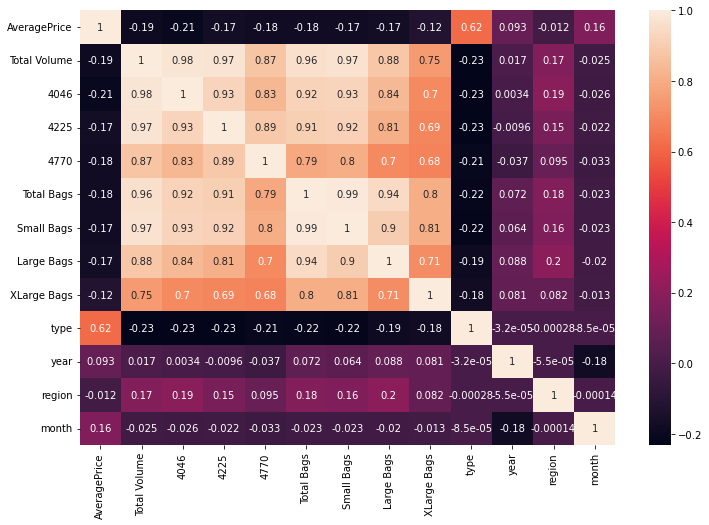

In [43]:
#Checking the correlation of the database
corr_mat=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True)

In [12]:
#importing the VIF in jupyter
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(df)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,AveragePrice,2.288679e+01
1,Total Volume,5.213172e+09
2,4046,6.947984e+08
3,4225,6.333882e+08
4,4770,4.974087e+06
5,Total Bags,2.502000e+14
6,Small Bags,1.429714e+14
7,Large Bags,1.521486e+13
8,XLarge Bags,7.856943e+10
9,type,3.399608e+00


array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

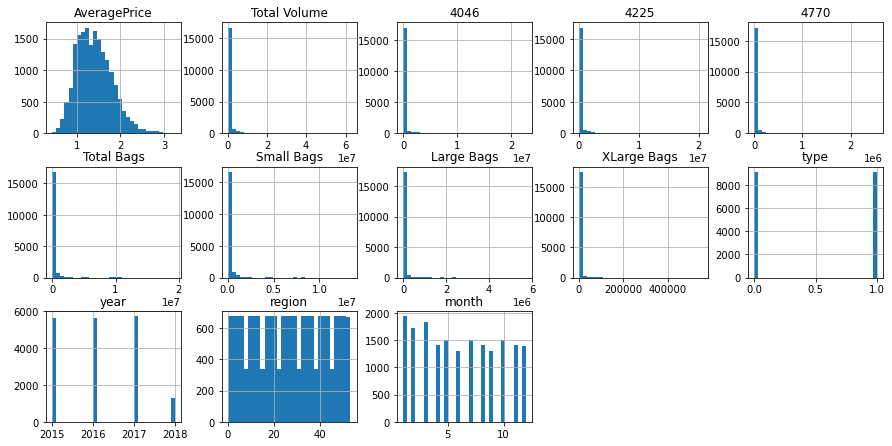

In [45]:
## Plotting Histogram for the database
df.hist(grid=True,layout=(4,5),figsize=(15,10),bins=30)

- The Numerical columns are positively skewed as shown in dataset

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

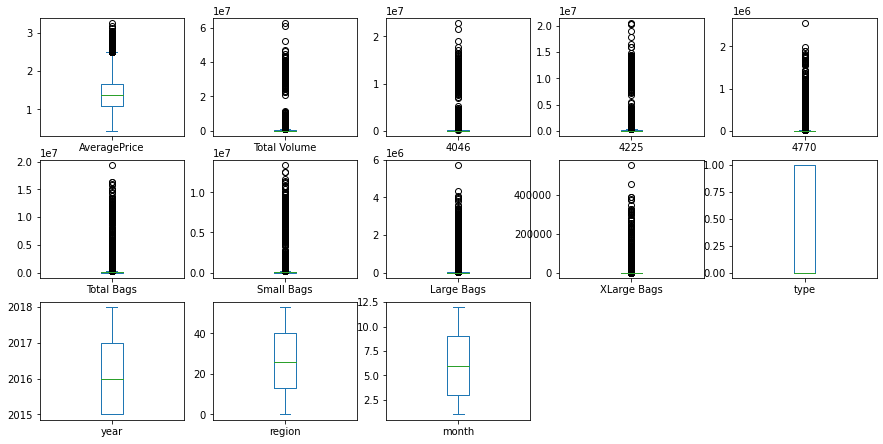

In [46]:
# Checking for outliers in data base by box plot method
df.plot(kind='box', subplots=True,layout=(4,5),figsize=(15,10))

<AxesSubplot:>

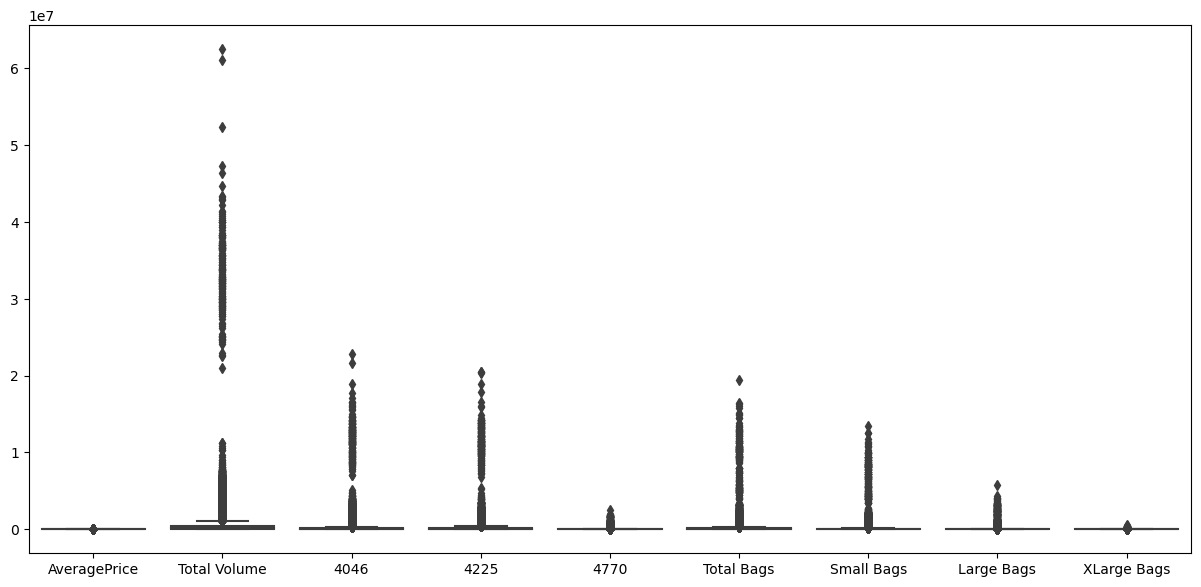

In [13]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

- As we can see that the Total volume, 4046, 4225, 4770, total bags , small bags , large bags, Xlarge bags are having the outliers and have to be removed for further processing

### Dealing with Outliers


In [14]:
# Importing Zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(18249, 13)

In [15]:
# Setting threshold at 3 and detecting the outliers
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [16]:
# Removing the outlier 
df=df[(z<3).all(axis=1)]
df.shape

(17651, 13)

In [17]:
#calculating loss
loss=(18249-17651)/18249*100
loss

3.276891884486821

As the loss of data is only 3.27% we can remove the outliers and Proceed Further

# Separating the data for train test Split in X and Y

In [18]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
print(x.shape)
print(y.shape)

(17651, 12)
(17651,)


# Regression Model for Average Price Prediction

In [19]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
x=power_transform(x, method='yeo-johnson')
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.97870686,
         1.57828237, -1.64028838],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.97870686,
         1.57828237, -1.64028838],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.97870686,
         1.57828237, -1.64028838]])

In [20]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(x)
skew_df.skew()

0    -0.008642
1    -0.039282
2    -0.044675
3     0.024168
4    -0.022204
5    -0.024405
6    -0.110913
7     0.853758
8    -0.037741
9     0.227731
10   -0.257799
11   -0.146554
dtype: float64

- As we can see the skewness has reduced

In [21]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.21061818,
        -2.01058988,  1.49138301],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.21061818,
        -2.01058988,  1.49138301],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.21061818,
        -2.01058988,  1.49138301],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.97873539,
         1.57828237, -1.64028838],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.97873539,
         1.57828237, -1.64028838],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.97873539,
         1.57828237, -1.64028838]])

In [22]:
# importing Linear Regression and metrics for it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [23]:
# Finding the best Random State
maxr2=0
maxrs=0
lr=LinearRegression()
for i in range(0,200):
    print("Random State is ", i)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(xtrain,ytrain)
    predtrain=lr.predict(xtrain)
    predtest=lr.predict(xtest)
    print('training accuracy is ', r2_score(ytrain,predtrain))
    score=r2_score(ytest,predtest)
    print('testing accuracy is ', score)
    print("\n")
    
    if score>maxr2:
        maxr2=score
        maxrs=i
        
        
print("maximum r2 score is ", maxr2 , "at random state ", maxrs)

Random State is  0
training accuracy is  0.5666882050160083
testing accuracy is  0.5634741496278667


Random State is  1
training accuracy is  0.5666103521825521
testing accuracy is  0.5639597075840952


Random State is  2
training accuracy is  0.5718413768134276
testing accuracy is  0.5427639160840694


Random State is  3
training accuracy is  0.5629430427731699
testing accuracy is  0.5786904612917032


Random State is  4
training accuracy is  0.5650976909776033
testing accuracy is  0.5700126247429147


Random State is  5
training accuracy is  0.5626002816407243
testing accuracy is  0.5793447239905818


Random State is  6
training accuracy is  0.5625167397348434
testing accuracy is  0.5797783923779247


Random State is  7
training accuracy is  0.5639485433044089
testing accuracy is  0.5742757516621944


Random State is  8
training accuracy is  0.564640199563857
testing accuracy is  0.5710759039975799


Random State is  9
training accuracy is  0.5651861772743902
testing accuracy is  0.

In [24]:
# Spliting data on the best Random state we have got
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=82)

In [25]:
#running that Linear Regression model 

lr.fit(x_train,y_train)
predtrainlr=lr.predict(x_train)
predtestlr=lr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainlr))
print('testing accuracy is ', r2_score(y_test,predtestlr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestlr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestlr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestlr)))

training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
Mean Squared Error is  0.06214169697059118
Mean Absolute Error is  0.19736746883639378
Root Mean Squared Error is  0.24928236393814782


In [26]:
from sklearn.model_selection import cross_val_score
#Cross validation of the lr model
for j in range(2,20):
    cv_score=cross_val_score(lr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())
    print('training accuracy is ', r2_score(y_train,predtrainlr))
    print('testing accuracy is ', r2_score(y_test,predtestlr))

At fold  2 Mean CV score is  -3.5371998372408875
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  3 Mean CV score is  0.192599043475148
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  4 Mean CV score is  0.15375417533857866
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  5 Mean CV score is  0.21843055959979357
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  6 Mean CV score is  0.1417246680896793
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  7 Mean CV score is  0.1630232876508375
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  8 Mean CV score is  0.15993074813639874
training accuracy is  0.561195932128886
testing accuracy is  0.5853134646524616
At fold  9 Mean CV score is  0.17669781278024144
training accuracy is  0.561195932128886
testing accu

In [34]:
# modelling using the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtraindtr=dtr.predict(x_train)
predtestdtr=dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraindtr))
print('testing accuracy is ', r2_score(y_test,predtestdtr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestdtr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestdtr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestdtr)))

training accuracy is  1.0
testing accuracy is  0.7681909516874952
Mean Squared Error is  0.034737099971679404
Mean Absolute Error is  0.12277824978759558
Root Mean Squared Error is  0.1863789150405147


In [35]:
#Cross validation of the dtr model
dtr=DecisionTreeRegressor()
for j in range(2,10):
    cvdtr=cross_val_score(dtr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cvdtr.mean())

At fold  2 Mean CV score is  -2.0299893210015454
At fold  3 Mean CV score is  -0.39541301723273153
At fold  4 Mean CV score is  -0.2972142895643943
At fold  5 Mean CV score is  -0.2894808292648716
At fold  6 Mean CV score is  -0.46140897729806224
At fold  7 Mean CV score is  -0.27119161212641707
At fold  8 Mean CV score is  -0.3147076486602005
At fold  9 Mean CV score is  -0.27792326074406554


In [36]:
# Modelling with randomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predtrainrfr=rfr.predict(x_train)
predtestrfr=rfr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrfr))
print('testing accuracy is ', r2_score(y_test,predtestrfr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrfr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrfr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrfr)))

training accuracy is  0.9842900397536949
testing accuracy is  0.8949622322742072
Mean Squared Error is  0.015740142435570655
Mean Absolute Error is  0.08891979609175871
Root Mean Squared Error is  0.12545972435634734


In [37]:
#Cross validation of the rfr model
for j in range(2,10):
    cv_score=cross_val_score(rfr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -1.1026392470549347
At fold  3 Mean CV score is  0.059776341074318874
At fold  4 Mean CV score is  0.13554770905940358
At fold  5 Mean CV score is  0.1898339778255491
At fold  6 Mean CV score is  0.19594421828823205
At fold  7 Mean CV score is  0.2639151770117838
At fold  8 Mean CV score is  0.2739499463913273
At fold  9 Mean CV score is  0.3375021513140347


In [39]:
# modelling with ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predtrainetr=etr.predict(x_train)
predtestetr=etr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainetr))
print('testing accuracy is ', r2_score(y_test,predtestetr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestetr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestetr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestetr)))

training accuracy is  1.0
testing accuracy is  0.9174331104357132
Mean Squared Error is  0.012372831509487392
Mean Absolute Error is  0.07745800056641179
Root Mean Squared Error is  0.11123323023938211


In [40]:
#Cross validation of the etr model
for j in range(2,10):
    cv_score=cross_val_score(etr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -1.1302150661108294
At fold  3 Mean CV score is  0.10999076699395142
At fold  4 Mean CV score is  0.19423861152496064
At fold  5 Mean CV score is  0.2829583585565086
At fold  6 Mean CV score is  0.2796080947355011
At fold  7 Mean CV score is  0.42197615453093373
At fold  8 Mean CV score is  0.4196420499208475
At fold  9 Mean CV score is  0.48896621834348214


In [30]:
# Modelling with SVR

from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
predtrainsvr=svr.predict(x_train)
predtestsvr=svr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainsvr))
print('testing accuracy is ', r2_score(y_test,predtestsvr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestsvr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestsvr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestsvr)))

training accuracy is  0.8034864425851105
testing accuracy is  0.8019551803106875
Mean Squared Error is  0.029677455433691807
Mean Absolute Error is  0.12872463505678572
Root Mean Squared Error is  0.17227145855797416


In [41]:
#Cross validation of the svr model
for j in range(2,10):
    cv_score=cross_val_score(svr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -1.1023673731544155
At fold  3 Mean CV score is  -0.26980849660239775
At fold  4 Mean CV score is  -0.0305047593170463
At fold  5 Mean CV score is  0.04549307194346035
At fold  6 Mean CV score is  0.015217592272076511
At fold  7 Mean CV score is  0.077563722524267
At fold  8 Mean CV score is  0.24152037037498103
At fold  9 Mean CV score is  0.2685764023603643


In [31]:
# Modeling for gradient boosting regresssor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predtraingbr=gbr.predict(x_train)
predtestgbr=gbr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraingbr))
print('testing accuracy is ', r2_score(y_test,predtestgbr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestgbr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestgbr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestgbr)))

training accuracy is  0.7523823219054163
testing accuracy is  0.7531189363319681
Mean Squared Error is  0.03699567489785663
Mean Absolute Error is  0.14708339934249554
Root Mean Squared Error is  0.192342597720465


In [ ]:
#Cross validation of the gbr model
for j in range(2,10):
    cv_score=cross_val_score(gbr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -1.454829871206504
At fold  3 Mean CV score is  0.22556924843228918
At fold  4 Mean CV score is  0.32796365545426653
At fold  5 Mean CV score is  0.3840233178102186
At fold  6 Mean CV score is  0.34330902496734444
At fold  7 Mean CV score is  0.3750668333625407


In [72]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [73]:
# Doing Lasso Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'tol': [0.001,0.0001,0.00001,0.000001]}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1e-05, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [74]:
ls=Lasso(alpha=1e-05, max_iter=100, random_state=0, tol=0.001)
ls.fit(x_train,y_train)
predtrainls=ls.predict(x_train)
predtestls=ls.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainls))
print('testing accuracy is ', r2_score(y_test,predtestls))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestls))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestls))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestls)))

training accuracy is  0.5655867201341678
testing accuracy is  0.5680929639839027
Mean Squared Error is  0.06352634729234177
Mean Absolute Error is  0.197428889223691
Root Mean Squared Error is  0.25204433596560305


In [75]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(ls, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -2.629308805859971
At fold  3 Mean CV score is  0.19194364514818138
At fold  4 Mean CV score is  0.15402614821125507
At fold  5 Mean CV score is  0.21840880401586146
At fold  6 Mean CV score is  0.14232202332996777
At fold  7 Mean CV score is  0.16300672833324345
At fold  8 Mean CV score is  0.16052322144796416
At fold  9 Mean CV score is  0.1768938666670661


In [76]:
# Doing Ridge Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

rg=Ridge()
clf=GridSearchCV(rg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'max_iter': 10, 'random_state': 9, 'solver': 'sag'}


In [77]:
rg=Ridge(alpha=1e-05, max_iter=10, random_state=4, solver='sag')
rg.fit(x_train,y_train)
predtrainrg=rg.predict(x_train)
predtestrg=rg.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrg))
print('testing accuracy is ', r2_score(y_test,predtestrg))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrg))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrg))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrg)))

training accuracy is  0.5654167318329034
testing accuracy is  0.5675814655831244
Mean Squared Error is  0.06360158020669075
Mean Absolute Error is  0.19742737101993155
Root Mean Squared Error is  0.2521935372024643


In [78]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(rg, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -2.615626571606599
At fold  3 Mean CV score is  0.17306446698232159
At fold  4 Mean CV score is  0.15009226300767015
At fold  5 Mean CV score is  0.2138313958481833
At fold  6 Mean CV score is  0.135025411883805
At fold  7 Mean CV score is  0.16643860539748578
At fold  8 Mean CV score is  0.16900929748018195
At fold  9 Mean CV score is  0.1760076407307275


#### Observations

- All models have shown higher testing accuracy at fold 9 for cross validation hence comparing models on the basis of fold 9
- It is observed that Extra Tree Regressor model is Showing 91% testing accuracy, 1 training accuracy
- For which we can say that Extra Tree Classifier model is considerably fitting the data, hence saving that model
- And Going Further for Hyper Parameter tunning of ExtraTreeRegressor

In [ ]:
# modelling with ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

parameter = {
    'n_estimators': [10,100],
    'criterion': ['mse', 'mae'],    
}

model = ExtraTreesRegressor ()

gcv = GridSearchCV(model,parameter,cv=9,n_jobs=-1).fit(x_train,y_train.values.ravel())

gcv.best_params_

#### Important observation Made
- I am avoiding the Hyper Parameter tunning as it getting more time (2hrs) than usual, I may be do not have that much CPU power.
- I have tried solving on google colab also but there too it is taking too much time
- hence I am saving the model ExtraTreeRegressor Model as this has given me the testing accuracy of 91% it can be considered as the model is predicting quite a good results
Saving Model

## Saving the Model

In [42]:
#Importing Job lib for saving the model
import joblib
joblib.dump(ExtraTreesRegressor(), "Avocado Average Price Prediction.pkl")

['Avocado Average Price Prediction.pkl']

In [44]:
a=np.array(y_test)
predicted=np.array(predtestetr)
df_con=pd.DataFrame({'Original':a,'Predicted':predtestetr}, index=range(len(a)))
df_con

,Original,Predicted
0,1.44,1.4830
1,0.92,1.1344
2,1.40,1.4872
3,1.36,1.3571
4,1.55,1.5108
...,...,...
3526,1.61,1.6415
3527,1.45,1.3531
3528,1.96,1.6955
3529,1.53,1.5529


# Classification model for predicting Type of Avocado
Starting from dividing the dataset in to X and Y

In [81]:
X=df.drop(['type'],axis=1)
Y=df['type']
print(X.shape)
print(Y.shape)

(17651, 12)
(17651,)


In [82]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
X=power_transform(X, method='yeo-johnson')
X

array([[-0.11782446, -0.07532391, -0.65742071, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [-0.06432986, -0.14749743, -0.77717852, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  1.97870686,
         1.57828237, -1.64028838],
       [ 1.31329624, -0.70179733, -0.54701087, ...,  1.97870686,
         1.57828237, -1.64028838],
       [ 0.61561867, -0.66738095, -0.35967077, ...,  1.97870686,
         1.57828237, -1.64028838]])

In [83]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0     0.000464
1    -0.008642
2    -0.039282
3    -0.044675
4     0.024168
5    -0.022204
6    -0.024405
7    -0.110913
8     0.853758
9     0.227731
10   -0.257799
11   -0.146554
dtype: float64

In [84]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[-0.11782446, -0.07532391, -0.65742071, ..., -1.21061818,
        -2.01058988,  1.49138301],
       [-0.06432986, -0.14749743, -0.77717852, ..., -1.21061818,
        -2.01058988,  1.49138301],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -1.21061818,
        -2.01058988,  1.49138301],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ...,  1.97873539,
         1.57828237, -1.64028838],
       [ 1.31329624, -0.70179733, -0.54701087, ...,  1.97873539,
         1.57828237, -1.64028838],
       [ 0.61561867, -0.66738095, -0.35967077, ...,  1.97873539,
         1.57828237, -1.64028838]])

In [85]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()

In [86]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.9583687340696686 randon state 1
Training Accuracy 0.9610481586402266 random state 1
max accuracy 0.9583687340696686 max_random_state 1
At Random State  2
testing accuracy 0.9629000283205891 randon state 2
Training Accuracy 0.9600566572237961 random state 2
max accuracy 0.9629000283205891 max_random_state 2
At Random State  3
testing accuracy 0.9606343811951289 randon state 3
Training Accuracy 0.9604107648725212 random state 3
At Random State  4
testing accuracy 0.9612007929764939 randon state 4
Training Accuracy 0.9609773371104816 random state 4
At Random State  5
testing accuracy 0.9580855281789861 randon state 5
Training Accuracy 0.9607648725212464 random state 5
At Random State  6
testing accuracy 0.9657320872274143 randon state 6
Training Accuracy 0.9597733711048159 random state 6
max accuracy 0.9657320872274143 max_random_state 6
At Random State  7
testing accuracy 0.962333616539224 randon state 7
Training Accuracy 0.9601983002832861 random st

In [87]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.9679977343528745 max_random_state 99


In [88]:
# train test split for the data with suggested random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=99)

In [89]:
# Checking score again for the the lr model 
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
predtrain=lg.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predlg))
print(confusion_matrix(Y_test,predlg))
print(classification_report(Y_test,predlg))

Training accuracy is  0.961685552407932
0.9580855281789861
[[1671   80]
 [  68 1712]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1751
           1       0.96      0.96      0.96      1780

    accuracy                           0.96      3531
   macro avg       0.96      0.96      0.96      3531
weighted avg       0.96      0.96      0.96      3531



In [90]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

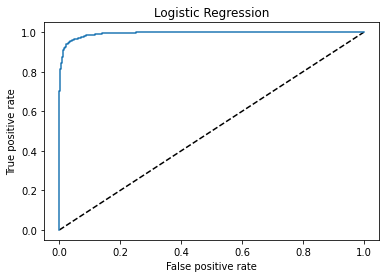

0.9580547873125469

In [91]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

In [92]:
# using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
predtrain=dtc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Training accuracy is  1.0
0.9915038232795242
[[1731   20]
 [  10 1770]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1751
           1       0.99      0.99      0.99      1780

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



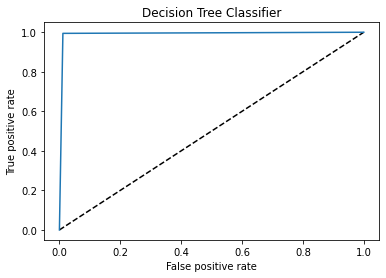

0.9914799889629682

In [93]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

In [94]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
predtrain=rf.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Training accuracy is  1.0
0.9980175587652224
[[1746    5]
 [   2 1778]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1751
           1       1.00      1.00      1.00      1780

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



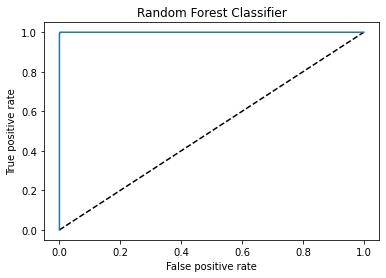

0.9980104466789443

In [95]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

In [97]:
# Using SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
predtrain=svc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Training accuracy is  0.9944050991501416
0.9943358821863495
[[1740   11]
 [   9 1771]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1751
           1       0.99      0.99      0.99      1780

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



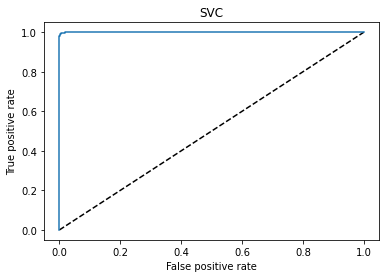

0.9943308478622167

In [98]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

In [99]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

Training accuracy is  0.9988668555240793
0.9980175587652224
[[1746    5]
 [   2 1778]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1751
           1       1.00      1.00      1.00      1780

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



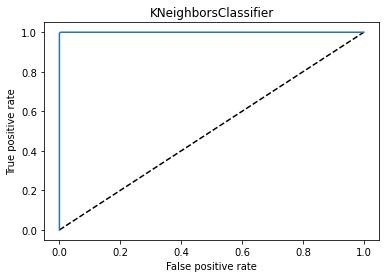

0.9980104466789443

In [100]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

In [101]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
predxgb=xgb.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predxgb))
print(confusion_matrix(Y_test,predxgb))
print(classification_report(Y_test,predxgb))

Training accuracy is  0.9988668555240793
0.9968847352024922
[[1745    6]
 [   5 1775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1751
           1       1.00      1.00      1.00      1780

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



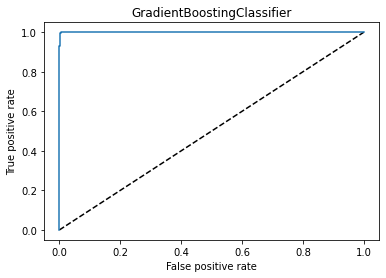

0.9968821989360815

In [102]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,xgb.predict(X_test))

auc_score

In [103]:
# using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
predtrain=ada.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predada))
print(confusion_matrix(Y_test,predada))
print(classification_report(Y_test,predada))

Training accuracy is  0.9961756373937677
0.9951854998583971
[[1740   11]
 [   6 1774]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1751
           1       0.99      1.00      1.00      1780

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



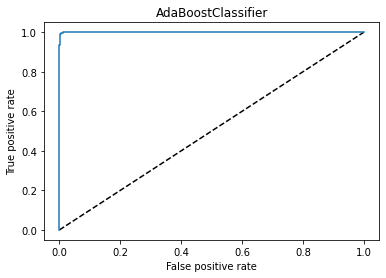

0.9951735444914303

In [104]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

In [105]:
# Using Naive bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
predtrain=gnb.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

Training accuracy is  0.9361898016997167
0.9277824978759558
[[1646  105]
 [ 150 1630]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1751
           1       0.94      0.92      0.93      1780

    accuracy                           0.93      3531
   macro avg       0.93      0.93      0.93      3531
weighted avg       0.93      0.93      0.93      3531



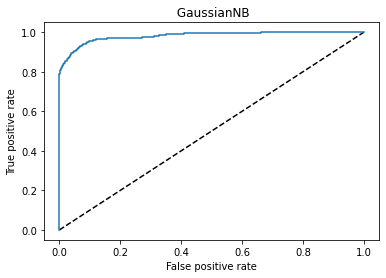

0.9278823016061448

In [106]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

In [107]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,xgb,ada,gnb,svc]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())

taking cv = 2
Cross validation score for  LogisticRegression()  is [0.94436891 0.92736544]
Mean of Cross Val. score is  0.9358671745660034
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.93728756 0.95955133 0.94475608]
Mean of Cross Val. score is  0.9471983206479058
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.95286653 0.95354634 0.95490596 0.93699003]
Mean of Cross Val. score is  0.9495772144814864
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.96856415 0.93654391 0.97903683 0.93852691 0.93201133]
Mean of Cross Val. score is  0.9509366252608421
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.96804895 0.93609789 0.96770904 0.94459551 0.96329028 0.9350561 ]
Mean of Cross Val. score is  0.9524662959496583
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.96748612 0.96748612 0.93457573 0.98096749 0.93177311 0.96469655
 0.92502975]
Mean of Cross Val. score is  0.9531449812736489


As we can see that the Cross validation score at fold for Random Forest Classifier is matching to its testing accuracy as well as training accuracy, which is slightly more than the other models

Hence selecting Random Forest Classifier for this Problem

I do not find need to do the hyperparameter tunning on the database as the random Forest Classifier is giving accuracy of 99.91% and hence I am going to save this model

In [108]:
#Importing Job lib for saving the model
import joblib
joblib.dump(RandomForestClassifier(), "Avocado Type Prediction.pkl")

['Avocado Type Prediction.pkl']

In [109]:
# Conclusion Step 
a=np.array(Y_test)
predicted=np.array(predrf)
df_con=pd.DataFrame({'Original':a,'Predicted':predrf}, index=range(len(a)))
df_con

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3526,1,1
3527,1,1
3528,0,0
3529,0,0


#                                       ********The End********